In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer_types=("SGD", "Momentum", "AdaGrad", "Adam")

def optim(optim_key):
    if optim_key == "SGD":
        return SGD()
    elif optim_key == "Momentum":
        return Momentum()
    elif optim_key == "AdaGrad":
        return AdaGrad()
    elif optim_key == "Adam":
        return Adam()
    else:
        return SGD()
    
optimizers = {}
networks = {}
train_loss = {}
for init_key, weight_type in weight_init_types.items():
    for optim_key in optimizer_types:
        networks[init_key+"-"+optim_key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10, weight_init_std=weight_type)
        optimizers[init_key+"-"+optim_key] = optim(optim_key = optim_key)
        train_loss[init_key+"-"+optim_key] = []

In [3]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in networks.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in networks.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01-SGD:2.302519321210434
std=0.01-Momentum:2.3025192843034086
std=0.01-AdaGrad:2.300385204891903
std=0.01-Adam:2.302368578903467
Xavier-SGD:2.305656321559426
Xavier-Momentum:2.325525441538648
Xavier-AdaGrad:2.1135076853820083
Xavier-Adam:2.264136515739053
He-SGD:2.3859334628928472
He-Momentum:2.408630914530913
He-AdaGrad:2.159435425582239
He-Adam:2.211461207558498
===========iteration:100===========
std=0.01-SGD:2.3026686638835967
std=0.01-Momentum:2.3038769098442557
std=0.01-AdaGrad:0.9728746977933188
std=0.01-Adam:1.5655286241570856
Xavier-SGD:2.228116681153943
Xavier-Momentum:0.6550990911236889
Xavier-AdaGrad:0.09312251991400555
Xavier-Adam:0.24815341265621285
He-SGD:1.560371408349175
He-Momentum:0.2931482009878766
He-AdaGrad:0.08000894477952791
He-Adam:0.15416321599989635
===========iteration:200===========
std=0.01-SGD:2.302294364194098
std=0.01-Momentum:2.3021791368230184
std=0.01-AdaGrad:0.5912010064719317
std=0.01-Adam:0.938840309271638
X

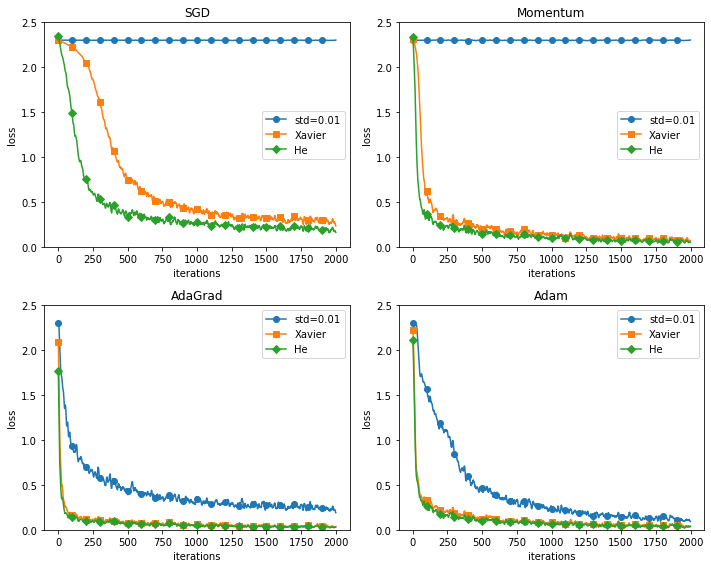

In [14]:
# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for key in weight_init_types.keys():
    axs[0, 0].plot(x, smooth_curve(train_loss[key+"-"+"SGD"]), marker=markers[key], markevery=100, label=key)
axs[0, 0].set_title('SGD')

for key in weight_init_types.keys():
    axs[0, 1].plot(x, smooth_curve(train_loss[key+"-"+"Momentum"]), marker=markers[key], markevery=100, label=key)
axs[0, 1].set_title('Momentum')

for key in weight_init_types.keys():
    axs[1, 0].plot(x, smooth_curve(train_loss[key+"-"+"AdaGrad"]), marker=markers[key], markevery=100, label=key)
axs[1, 0].set_title('AdaGrad')

for key in weight_init_types.keys():
    axs[1, 1].plot(x, smooth_curve(train_loss[key+"-"+"Adam"]), marker=markers[key], markevery=100, label=key)
axs[1, 1].set_title('Adam')    

for ax in axs.flat:
    ax.set(xlabel = "iterations", ylabel="loss", ylim=(0,2.5), )
    ax.legend()
    
plt.tight_layout()

plt.show()